In [1]:
# JDEM Visualizaciones con python
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

In [2]:
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

In [3]:
df = get_iris_df()
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [4]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Desgloce por: ' + var, fontsize=25)

plt.savefig('desglose_por_' + var + '.jpg')
plt.close()

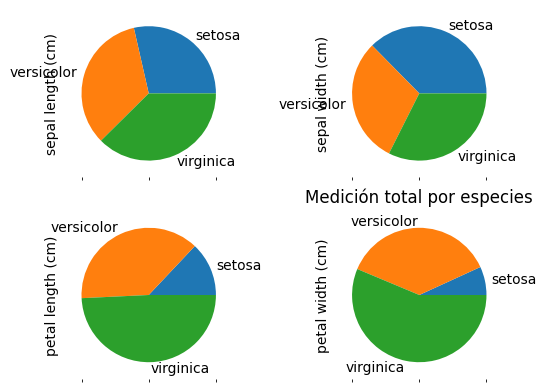

In [5]:
sums_by_species = df.groupby('species').sum()

sums_by_species.plot(kind='pie', subplots=True, layout=(2,2), legend=False)
plt.title('Medición total por especies')
plt.show()

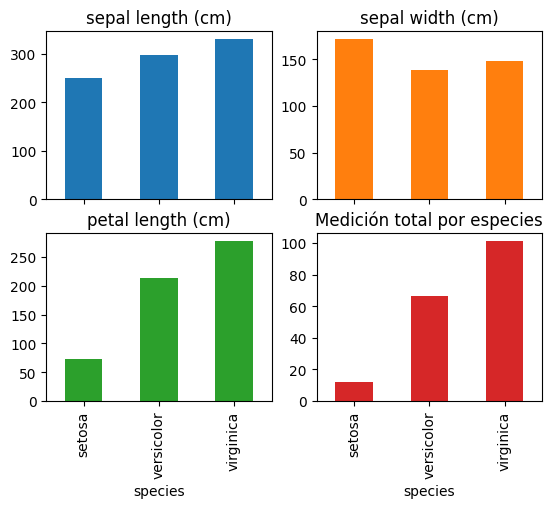

In [6]:
sums_by_species.plot(kind='bar', subplots=True, layout=(2,2), legend=False)
plt.title('Medición total por especies')
plt.show()

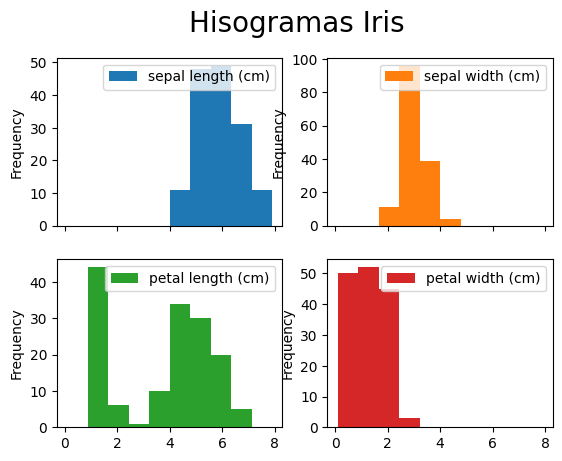

In [7]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Hisogramas Iris', fontsize=20)
plt.show()

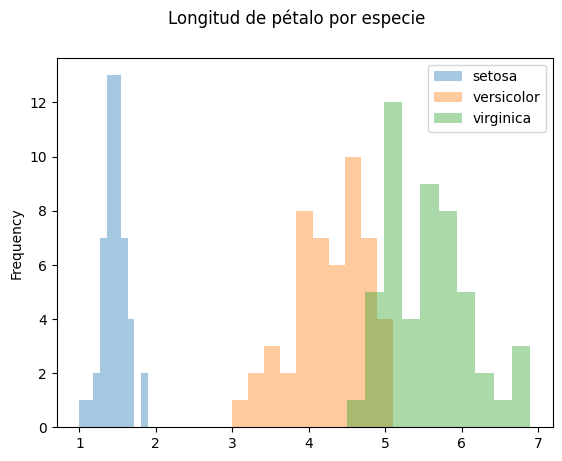

In [8]:

for spec in df['species'].unique():
    forspec = df[df['species'] == spec]
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Longitud de pétalo por especie')
plt.show()

In [9]:
col = df['petal length (cm)']
promedio = col.mean()
std = col.std()
mediana = col.quantile(0.5)
percentil_25 = col.quantile(0.25) # cuartil 1
percentil_75 = col.quantile(0.75) # cuartil 3
print(f'Promedio: {promedio}, Desviación estándar: {std}, Mediana: {mediana}, Percentil 25: {percentil_25}, Percentil 75: {percentil_75}')

Promedio: 3.7580000000000005, Desviación estándar: 1.7652982332594662, Mediana: 4.35, Percentil 25: 1.6, Percentil 75: 5.1


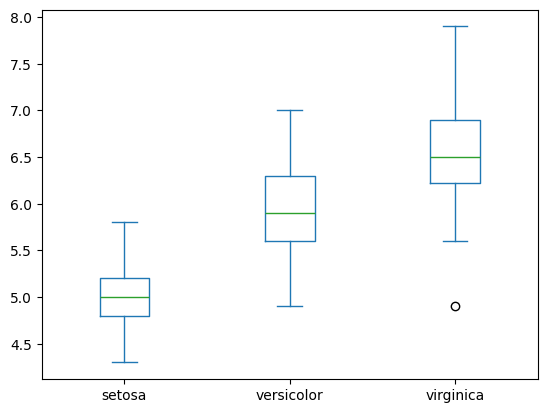

In [10]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i%50)
df.pivot(index='ind', columns='species')[col].plot(kind='box')
plt.show()

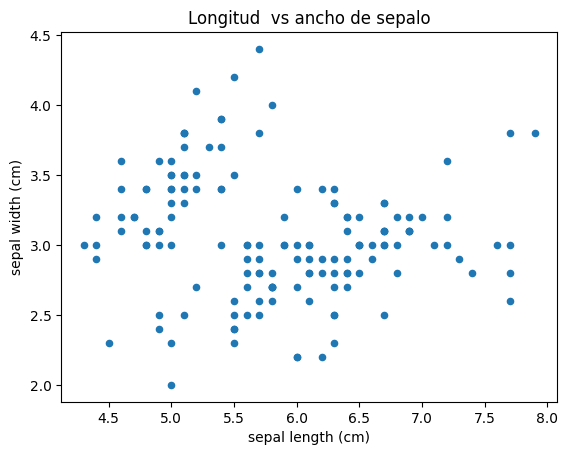

In [11]:
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')
plt.title('Longitud  vs ancho de sepalo')
plt.show()

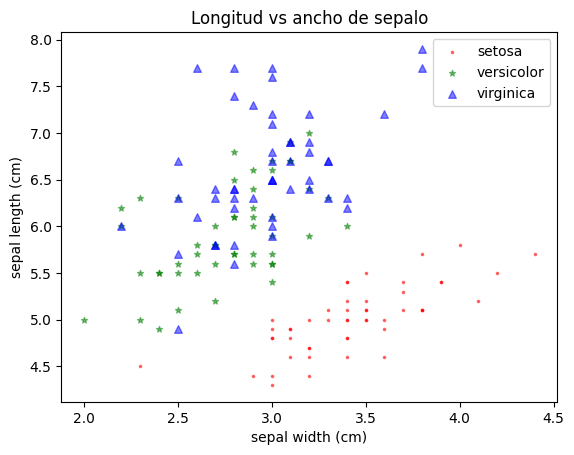

In [12]:
colors = ["r", "g", "b"]
markers = [".", "*", "^"]

fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df["species"].unique()):
    ddf = df[df["species"] == spec]
    ddf.plot(
        kind="scatter",
        x="sepal width (cm)",
        y="sepal length (cm)",
        alpha=0.5,
        s=10 * (i + 1),
        ax=ax,
        color=colors[i],
        marker=markers[i],
        label=spec,
    )
plt.title("Longitud vs ancho de sepalo")
plt.show()

In [13]:

import pandas as pd
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt

In [14]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="s+", skiprows=22, header=None)

C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_24068\2302406344.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_df = pd.read_csv(data_url, sep="s+", skiprows=22, header=None)


In [15]:
import sklearn.datasets as ds
boston = ds.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df.plot(x='CRIM', y='MEDV', kind='scatter')
plt.title('Índice de criminalidad con eje logarítmico')
plt.show()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


KeyError: 'CRIM'

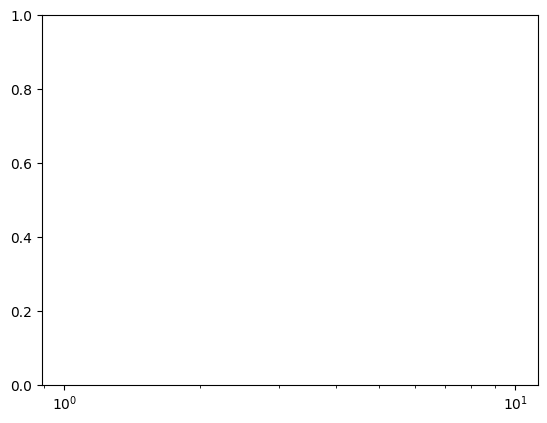

In [16]:
df.plot(x='CRIM', y='MEDV', kind='scatter', logx=True)
plt.tittle('Indice de ciminalidad de un eje normal')
plt.show()